<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Create-synthetic-dataset" data-toc-modified-id="Create-synthetic-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create synthetic dataset</a></span></li><li><span><a href="#Compare" data-toc-modified-id="Compare-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Comparison of F-test and mutual information

</font>
</div>

# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# Create synthetic dataset
<hr style="border:2px solid black"> </hr>

In [2]:
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

# Compare
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- This example illustrates the differences between univariate F-test statistics and mutual information.

- We consider 3 features `x_1`, `x_2`, `x_3` distributed uniformly over [0, 1], the target depends on them as follows: `y = x_1 + sin(6 * pi * x_2) + 0.1 * N(0, 1)`, that is the third features is completely irrelevant.

- The code below plots the dependency of y against individual x_i and normalized values of univariate F-tests statistics and mutual information.
    
</font>
</div>

In [ ]:
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

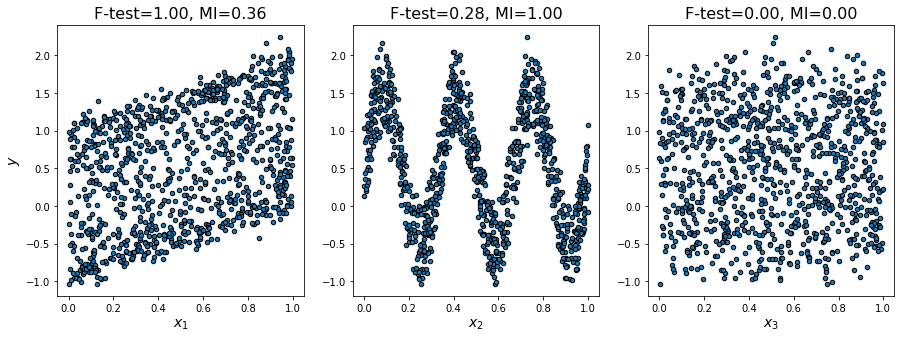

In [3]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()

<div class="alert alert-info">
<font color=black>

- As F-test captures only linear dependency, it rates x_1 as the most discriminative feature. 
- On the other hand, mutual information can capture any kind of dependency between variables and it rates x_2 as the most discriminative feature, which probably agrees better with our intuitive perception for this example. 
- Both methods correctly marks x_3 as irrelevant.

</font>
</div>

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

</font>
</div>